In [1]:
import gzip
import pickle
with gzip.open("cache/matbench_discovery_mp_trj_full_tol_0.01/data.pkl.gz", "rb") as f:
    dataset_pd = pickle.load(f)

In [2]:
from evaluation.novelty import record_to_augmented_fingerprint

In [3]:
from pandarallel import pandarallel
pandarallel.initialize()
for dataset in dataset_pd.values():
    dataset["fingerprint"] = dataset.parallel_apply(record_to_augmented_fingerprint, axis=1)

INFO: Pandarallel will run on 24 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [4]:
import pandas as pd
mptrj = pd.concat((dataset_pd['train'], dataset_pd['val']), axis=0)
wbm = dataset_pd['test']

In [5]:
mptrj_groups = mptrj.groupby("fingerprint")

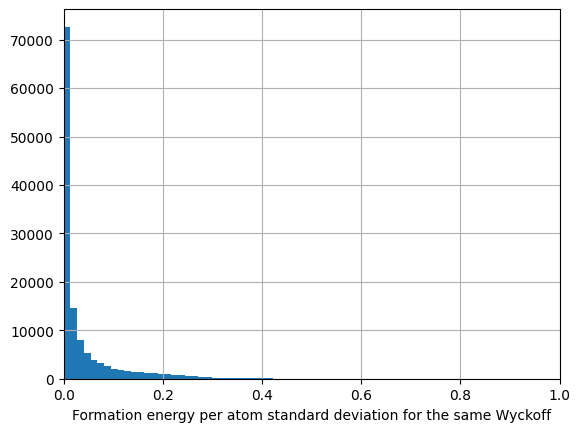

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
mptrj_groups.formation_energy_per_atom.std().hist(bins=300, ax=ax)
ax.set_xlim(0, 1)
ax.set_xlabel("Formation energy per atom standard deviation for the same Wyckoff");

In [8]:
duplicates = mptrj_groups.apply(len)

/tmp/ipykernel_2406438/1782743068.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  duplicates = mptrj_groups.apply(len)


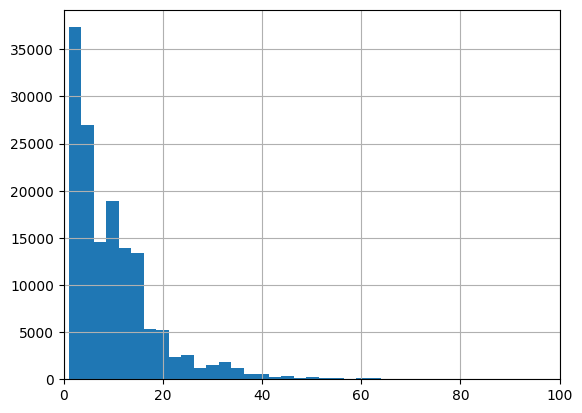

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
duplicates.hist(bins=1000, ax=ax)
ax.set_xlim(0, 100);

In [10]:
wbm_duplicates = wbm.groupby("fingerprint").apply(len)

/tmp/ipykernel_2406438/3018316197.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  wbm_duplicates = wbm.groupby("fingerprint").apply(len)


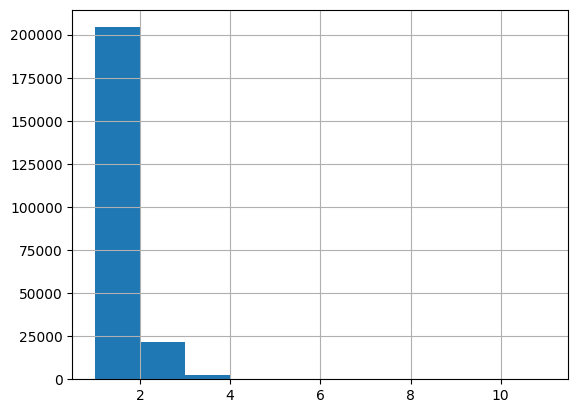

In [11]:
fig, ax = plt.subplots()
wbm_duplicates.hist(bins=10, ax=ax);

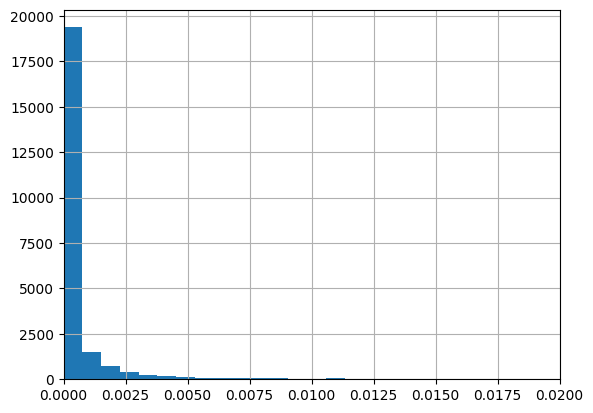

In [12]:
fig, ax = plt.subplots()
wbm.groupby("fingerprint").formation_energy_per_atom.std().hist(bins=5000, ax=ax)
ax.set_xlim(0, 0.02);

In [13]:
len(wbm.groupby("fingerprint"))

228840

In [14]:
len(wbm)

256963

In [15]:
filtered_mptrj = mptrj.loc[mptrj.groupby("fingerprint").formation_energy_per_atom.idxmin()]

In [16]:
len(filtered_mptrj), len(mptrj)

(149669, 1580395)